# Chargement et Analyse exploratoire des données (EDA)

## Chargement des Données

In [10]:
import pandas as pd

df = pd.read_csv("dataset-diabetes.csv")

## Comprendre la structure générale du jeu de données

In [11]:
pd.set_option('display.width', 500)

print(df.dtypes)

print("\n")

print("Dimensions:", df.shape)

print("Le nombre des lignes est:", df.shape[0])

print("Le nombre de colonnes est:", df.shape[1])

print("\n")

print(df.head())

print("\n")

print(df.tail())

print("\n")

print(df.sample(5))

Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


Dimensions: (768, 9)
Le nombre des lignes est: 768
Le nombre de colonnes est: 9


   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0           0            6      148             72             35        0  33.6                     0.627   50
1           1            1       85             66             29        0  26.6                     0.351   31
2           2            8      183             64              0        0  23.3                     0.672   32
3           3            1       89             66             23       94  28.1                     0.167   21
4           4     

## Identifier les valeurs manquantes et les doublons.

In [12]:
df.duplicated().sum()

np.int64(0)

### Il n'ya pas de doublons

In [13]:
df.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [14]:
(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [15]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])


In [22]:
import numpy as np

df[['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']] = df[['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']].replace(0,np.nan)


## Analyser la distribution des variables numériques.

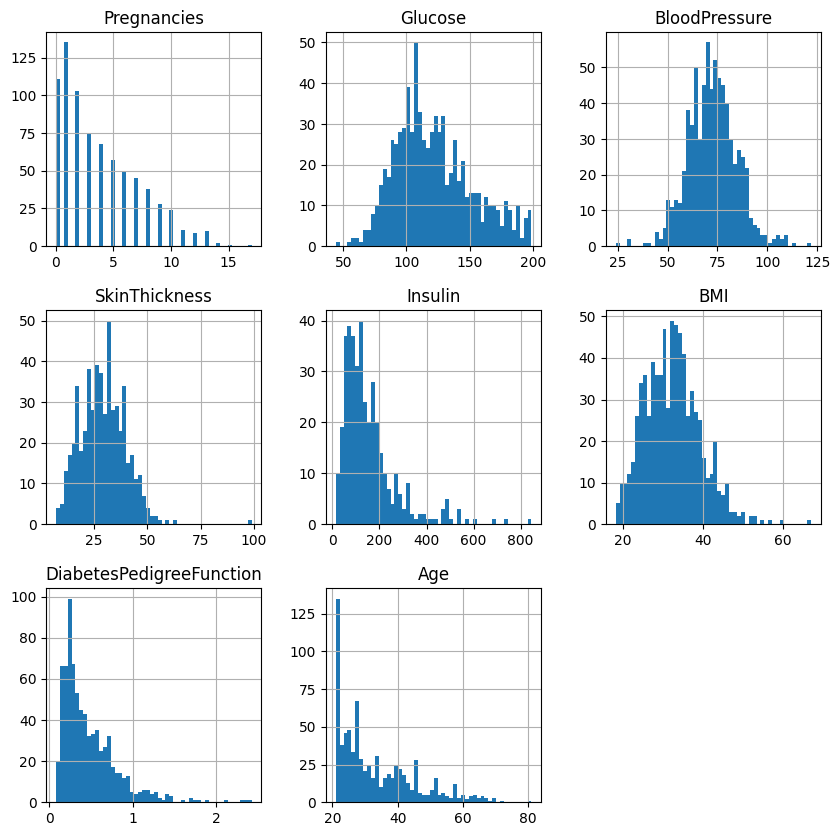

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=50, figsize=(10, 10))
plt.show()


### Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations

                          Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age
Pregnancies                  1.000000  0.128135       0.214178       0.100239  0.082171  0.021719                 -0.033523  0.544341
Glucose                      0.128135  1.000000       0.223192       0.228043  0.581186  0.232771                  0.137246  0.267136
BloodPressure                0.214178  0.223192       1.000000       0.226839  0.098272  0.289230                 -0.002805  0.330107
SkinThickness                0.100239  0.228043       0.226839       1.000000  0.184888  0.648214                  0.115016  0.166816
Insulin                      0.082171  0.581186       0.098272       0.184888  1.000000  0.228050                  0.130395  0.220261
BMI                          0.021719  0.232771       0.289230       0.648214  0.228050  1.000000                  0.155382  0.025841
DiabetesPedigreeFunction    -0.033523  0.137246      -0.002805

<Axes: >

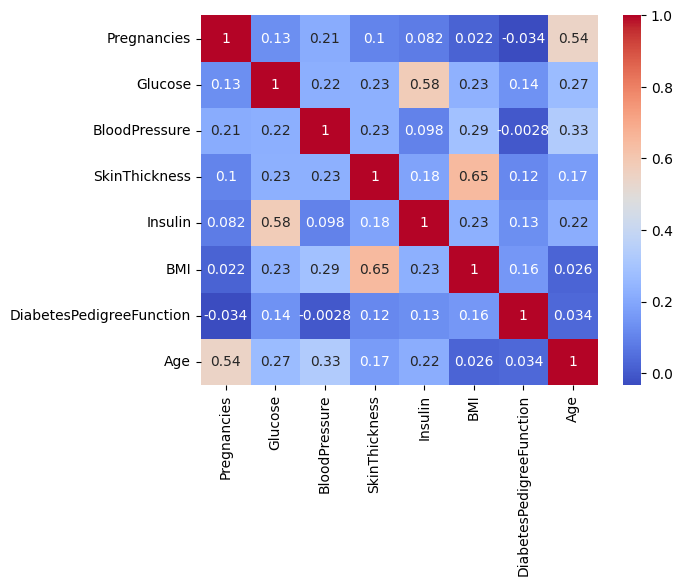

In [18]:
corr_matrix = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

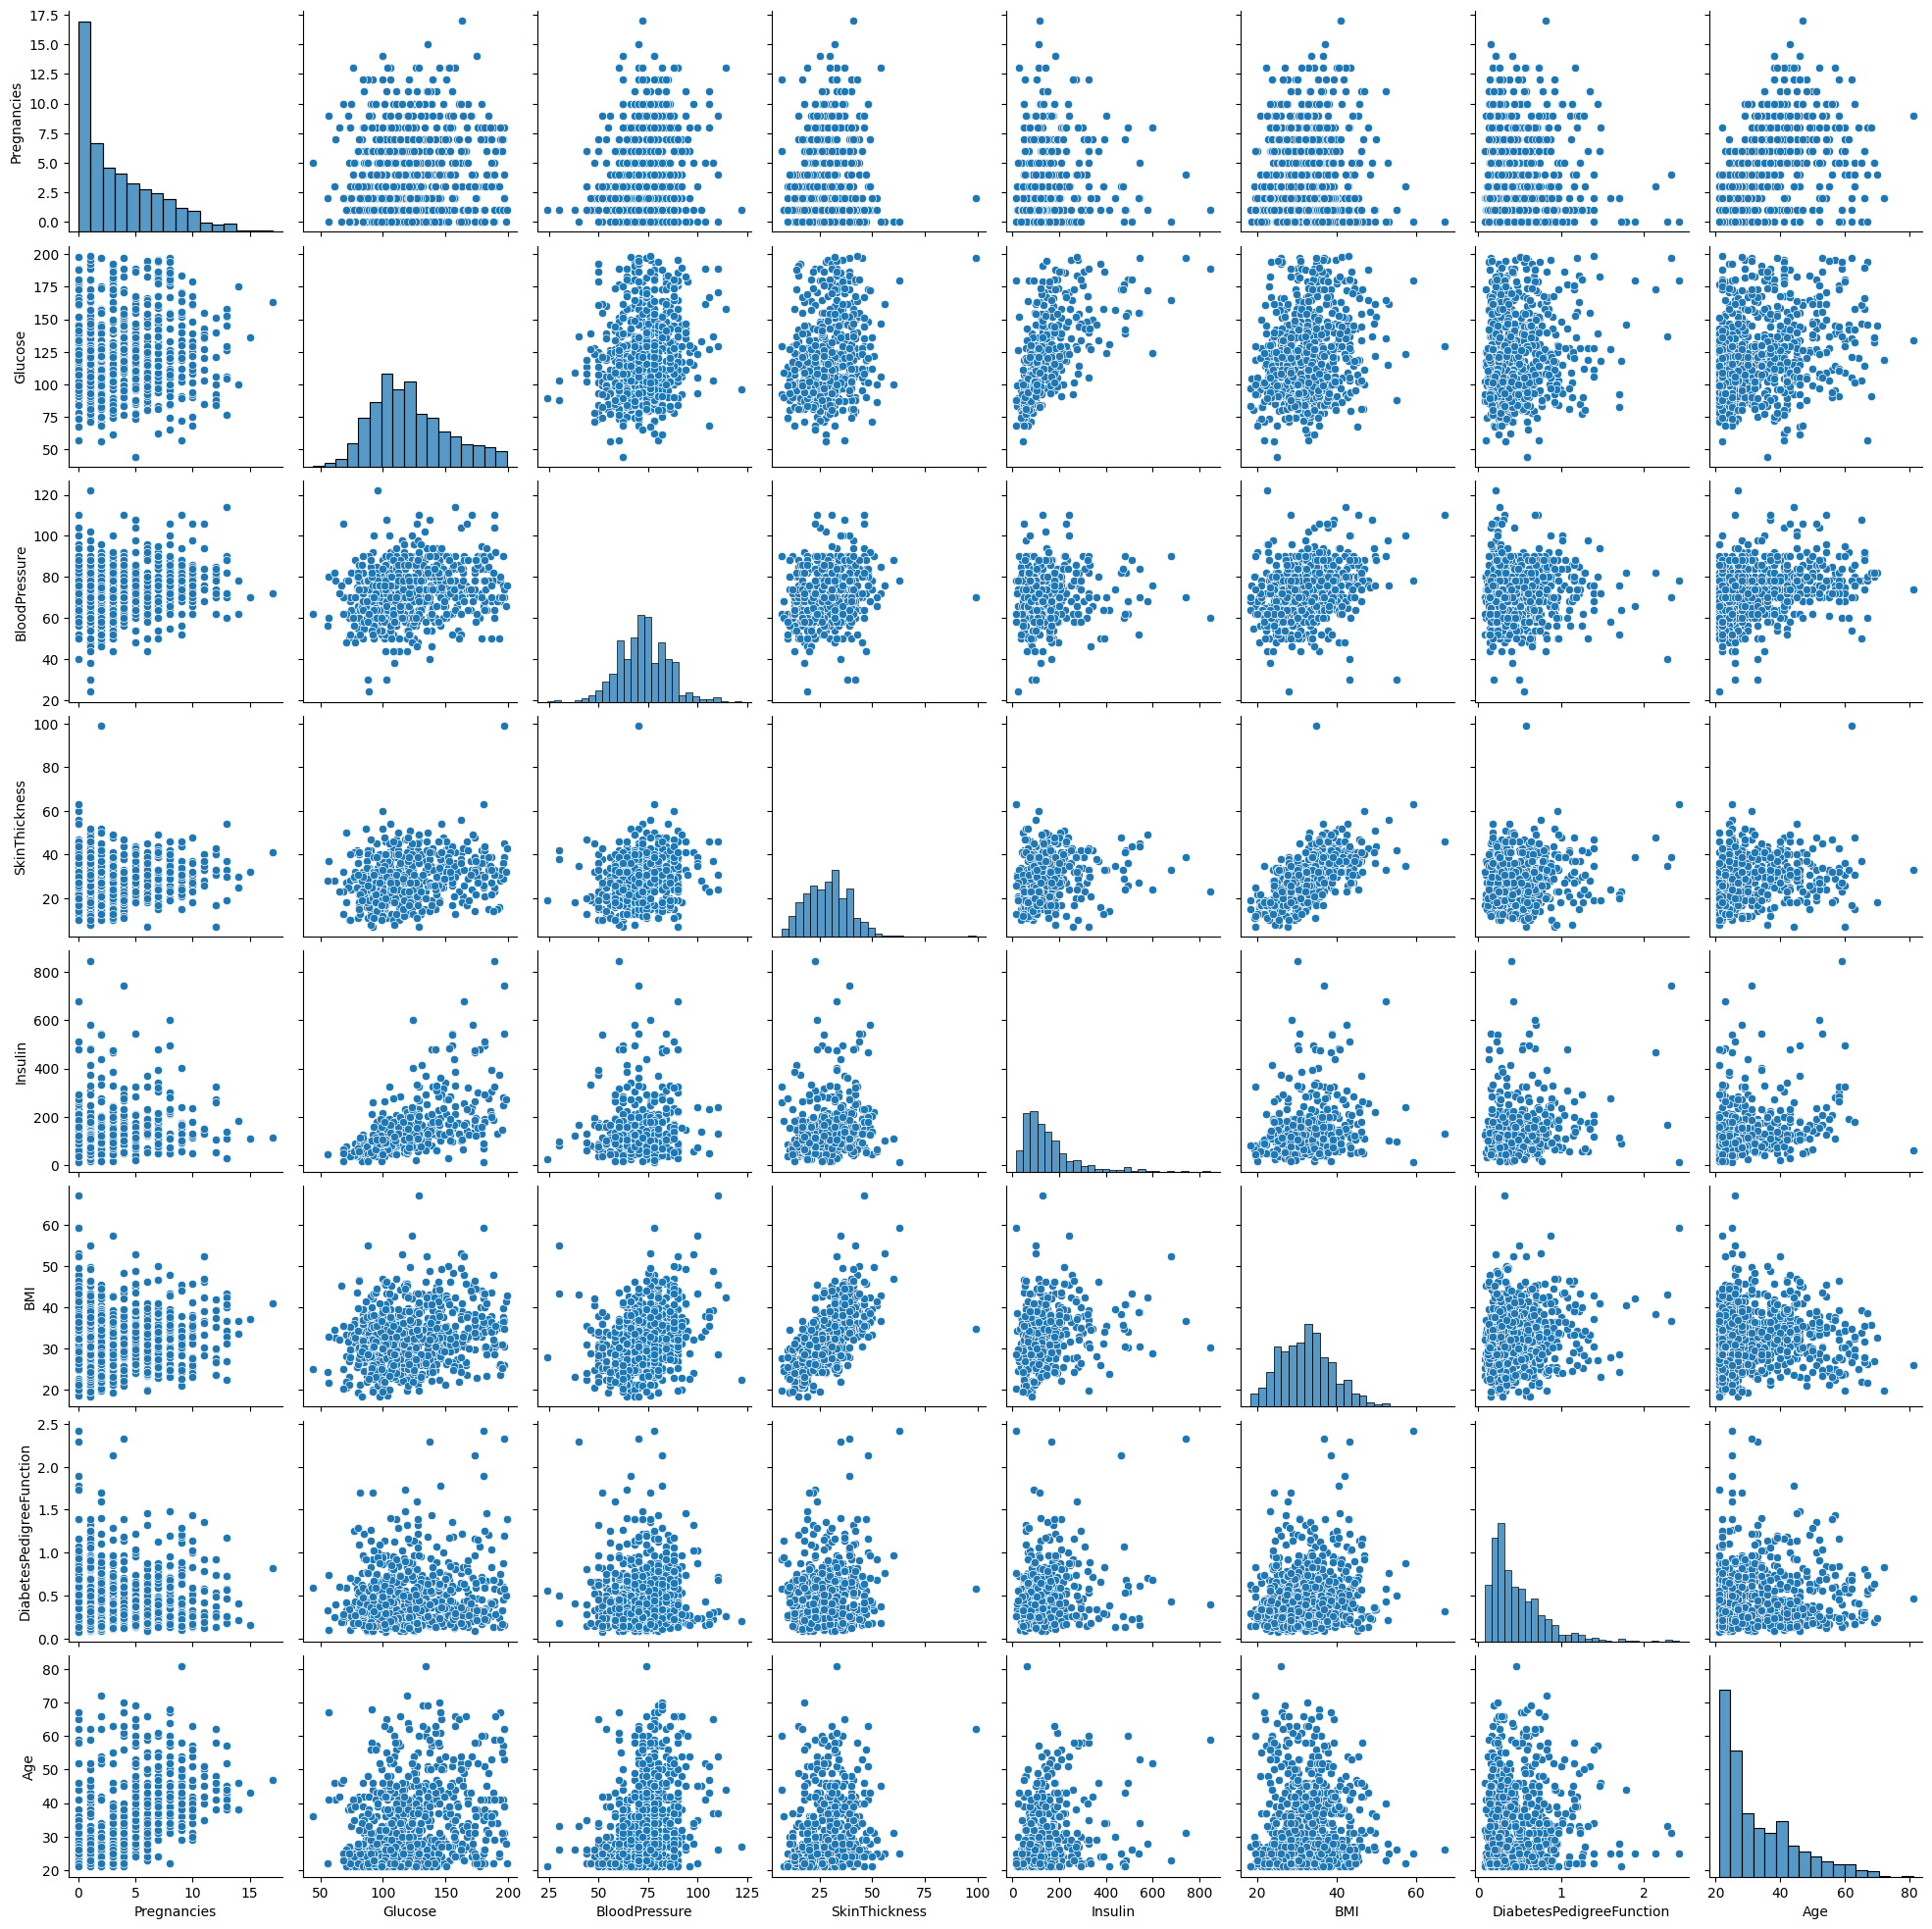

In [19]:
sns.pairplot(df)
plt.show()

### Identifier et traiter les valeurs manquantes dans le jeu de données

In [28]:
pd.isna(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [29]:
from sklearn.impute import KNNImputer

df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = KNNImputer(n_neighbors = 5).fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [31]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,209.0,33.6,0.627,50
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31
2,8,183.0,64.0,29.4,383.2,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,213.4,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,20.6,180.8,30.1,0.349,47


### Détection et gestion des valeurs aberrantes

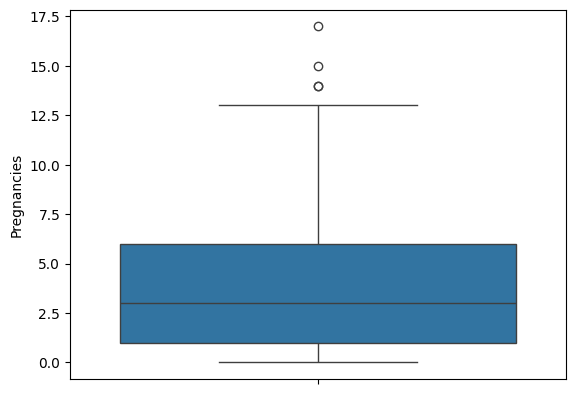

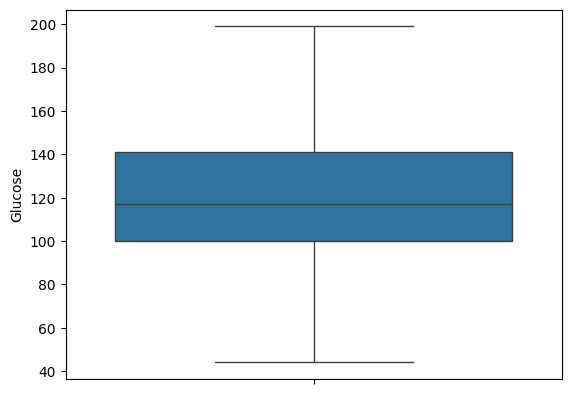

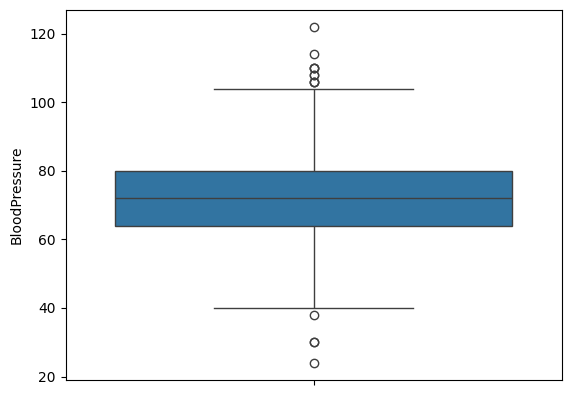

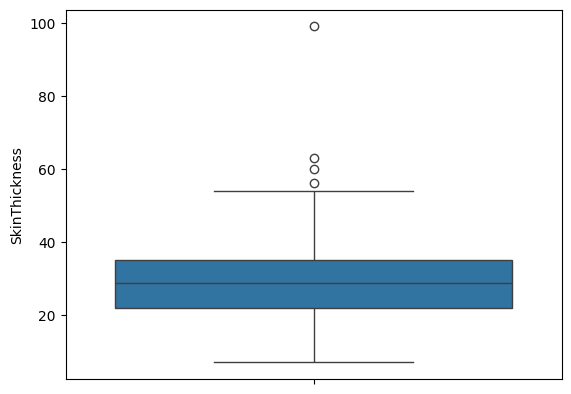

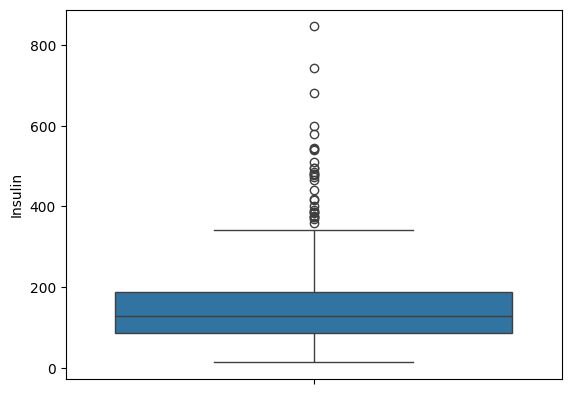

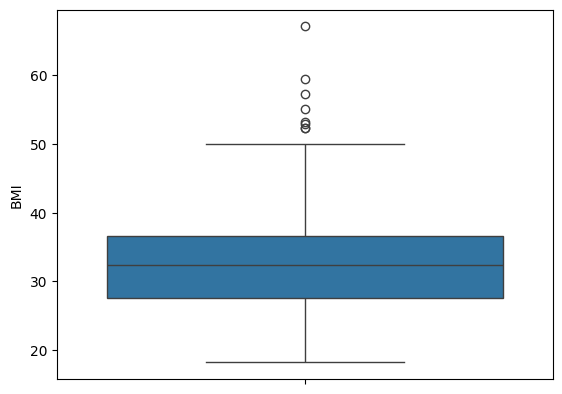

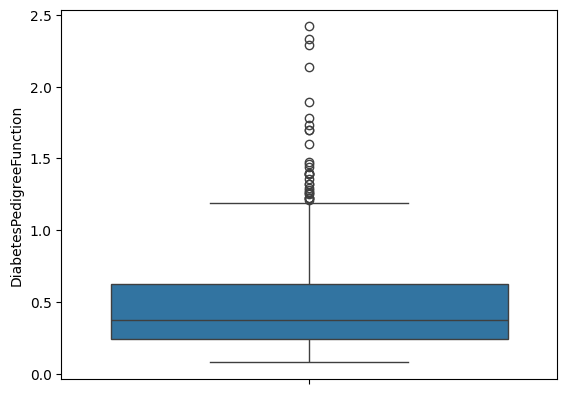

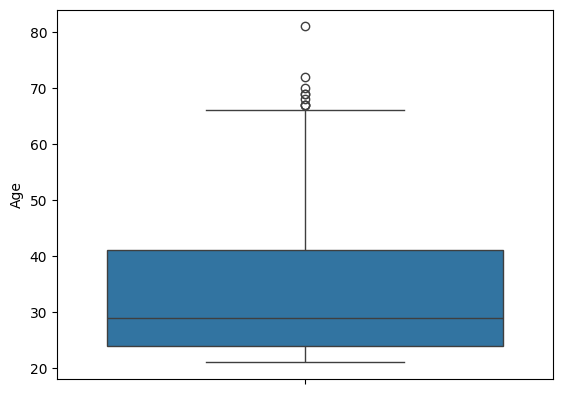

In [43]:
sns.boxplot(y=df['Pregnancies'])
plt.show()
sns.boxplot(y=df['Glucose'])
plt.show()
sns.boxplot(y=df['BloodPressure'])
plt.show()
sns.boxplot(y=df['SkinThickness'])
plt.show()
sns.boxplot(y=df['Insulin'])
plt.show()
sns.boxplot(y=df['BMI'])
plt.show()
sns.boxplot(y=df['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(y=df['Age'])
plt.show()

In [71]:
from sklearn.model_selection import train_test_split

df_capped = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

columns_to_cap = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in columns_to_cap:

    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    df_capped[col] = np.clip(df_capped[col], lower_bound, upper_bound)

### Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations après le prétraitement des données

                          Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age
Pregnancies                  1.000000  0.127348       0.215553       0.104139  0.077015  0.032136                 -0.016389  0.547937
Glucose                      0.127348  1.000000       0.232717       0.239274  0.681476  0.235466                  0.118419  0.267742
BloodPressure                0.215553  0.232717       1.000000       0.254790  0.142235  0.303659                  0.014351  0.334426
SkinThickness                0.104139  0.239274       0.254790       1.000000  0.298310  0.680559                  0.096502  0.114330
Insulin                      0.077015  0.681476       0.142235       0.298310  1.000000  0.339224                  0.109831  0.177913
BMI                          0.032136  0.235466       0.303659       0.680559  0.339224  1.000000                  0.137526  0.040686
DiabetesPedigreeFunction    -0.016389  0.118419       0.014351

<Axes: >

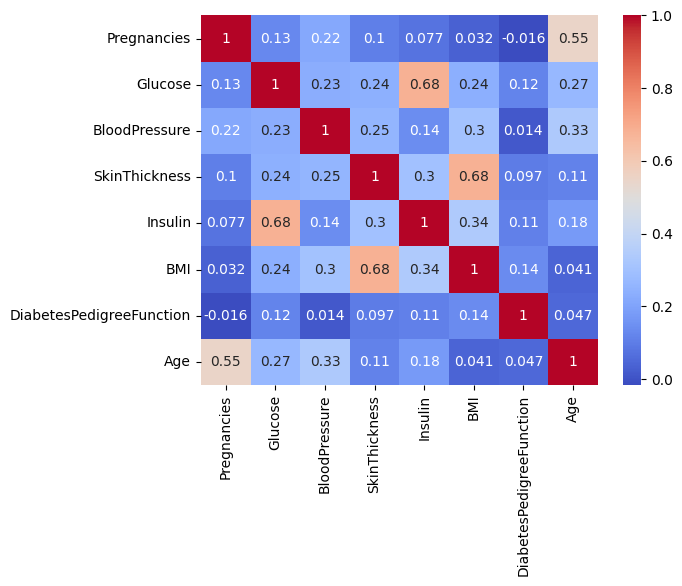

In [72]:
new_corr_matrix = df_capped.corr()
print(new_corr_matrix)
sns.heatmap(new_corr_matrix, annot = True, cmap='coolwarm')

### Sélectionner les variables présentant la plus grande variabilité.

In [73]:
df_variability = (df_capped.std()/df_capped.mean()).sort_values(ascending = False)
print(df_variability)
print('\n')
print("les variables présentant la plus grande variabilité sont: \n", df_variability.head(3))

Pregnancies                 0.876341
DiabetesPedigreeFunction    0.622331
Insulin                     0.546774
Age                         0.350255
SkinThickness               0.316843
Glucose                     0.250175
BMI                         0.206127
BloodPressure               0.163065
dtype: float64


les variables présentant la plus grande variabilité sont: 
 Pregnancies                 0.876341
DiabetesPedigreeFunction    0.622331
Insulin                     0.546774
dtype: float64


### Visualiser les relations entre les variables via le pairplot


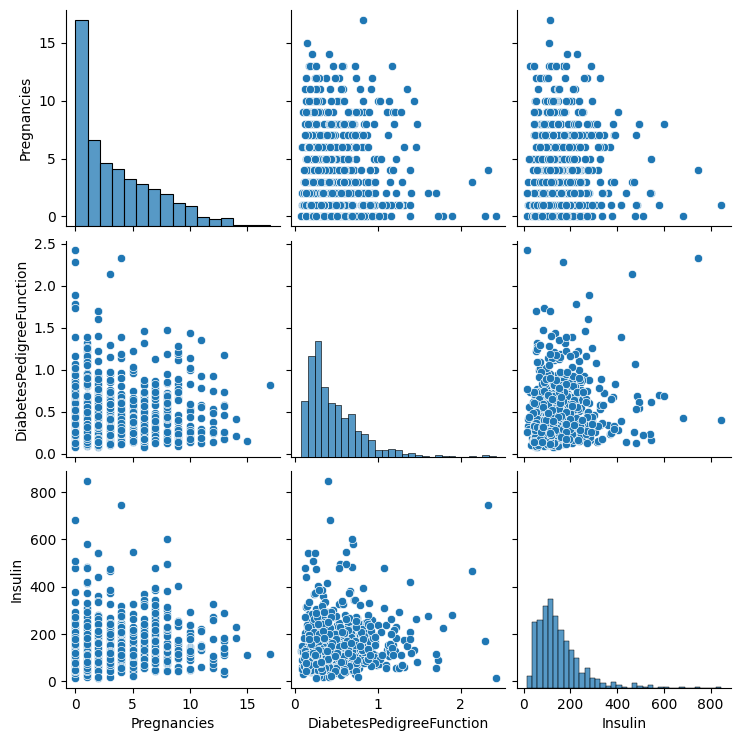

In [74]:
sns.pairplot(df[['Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']])
plt.show()

### Standardiser les échelles des variables numériques

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df_capped = pd.DataFrame(standard_scaler.fit_transform(df_capped), columns=df_capped.columns)

### Déterminer la valeur optimale de k via la méthode du coude et silhouette

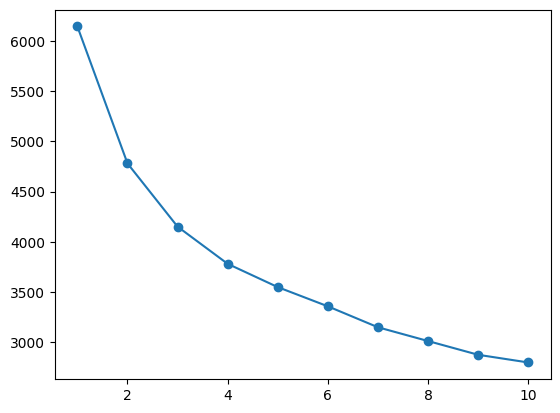

In [92]:
from sklearn.cluster import KMeans

inertia_values = []

for k in range(1,11):

    kmeans = KMeans(n_clusters=k, random_state = 42, n_init='auto')

    kmeans.fit(df_capped)

    inertia_values.append(kmeans.inertia_)

plt.plot(range(1,11), inertia_values, marker='o', linestyle='-')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

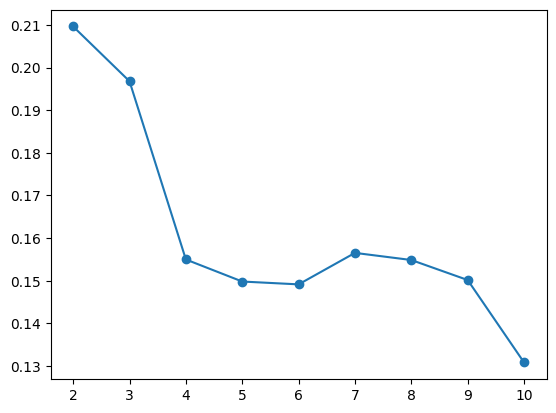

In [94]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 'auto')
    kmeans.fit(df_capped)

    labels = kmeans.labels_

    score = silhouette_score(df_capped, labels)
    silhouette_scores.append(score)

plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='-')
plt.show

### Entraîner un modèle K-Means avec le nombre de clusters choisi

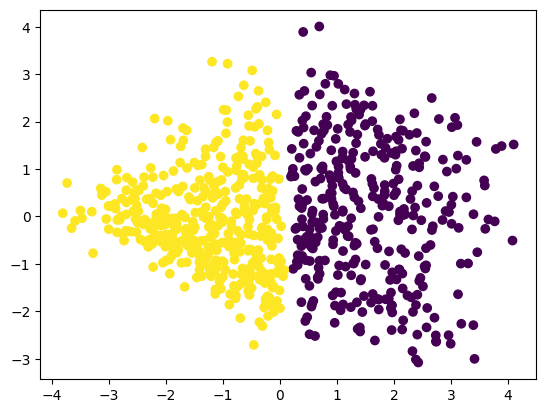

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

df_capped_pca = pd.DataFrame(pca.fit_transform(df_capped), columns=['PC1','PC2'])

kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(df_capped)

plt.scatter(df_capped_pca.iloc[:, 0], df_capped_pca.iloc[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')

plt.show()
 

Le graphique ci-dessus présente la répartition des observations en deux clusters, visualisée à l’aide des deux premières composantes principales issues de l’analyse en composantes principales (ACP). On observe une séparation nette entre les deux groupes, principalement le long de la première composante principale (PC1), ce qui suggère que cette dimension explique une grande partie de la variance entre les individus. Le Cluster 0 (en jaune) regroupe des individus aux caractéristiques similaires, distinctes de celles du Cluster 1 (en violet), situé de l’autre côté de l’axe principal. Cette séparation claire indique que les groupes identifiés par l’algorithme de KMeans sont bien différenciés, ce qui renforce la pertinence du clustering. Pour affiner l’interprétation, il serait utile d’analyser les moyennes des variables d’origine par cluster afin de mieux comprendre les profils typiques des individus dans chaque groupe.

### Ajouter une colonne Cluster au dataset indiquant le groupe assigné à chaque individu

In [117]:
df_capped['Cluster'] = kmeans.labels_
df_capped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.639947,0.863078,-0.027751,0.679298,0.811591,0.180376,0.588927,1.445691,0
1,-0.844885,-1.206933,-0.536816,0.021443,-0.907404,-0.868563,-0.378101,-0.189304,1
2,1.233880,2.013084,-0.706504,0.065300,2.506255,-1.363062,0.746595,-0.103252,0
3,-0.844885,-1.075504,-0.536816,-0.636412,-0.641971,-0.643790,-1.022787,-1.049828,1
4,-1.141852,0.501647,-2.742765,0.679298,0.293365,1.603936,2.596563,-0.017199,0
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.681216,0.311626,2.104652,0.445041,0.075482,-1.008772,2.564372,0
764,-0.547919,0.008788,-0.197439,-0.197842,0.867206,0.659891,-0.416642,-0.533513,1
765,0.342981,-0.024070,-0.027751,-0.636412,-0.414457,-0.928502,-0.749497,-0.275356,1
766,-0.844885,0.140217,-1.045881,-0.899554,0.455152,-0.344093,-0.385109,1.187534,1


In [128]:
features_scaled = df_capped.drop(columns='Cluster')

features_original = pd.DataFrame(
    standard_scaler.inverse_transform(features_scaled),
    columns=features_scaled.columns
)


features_original['Cluster'] = df_capped['Cluster'].values


cluster_means_original = features_original.groupby('Cluster').mean()


print(cluster_means_original)


         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin        BMI  DiabetesPedigreeFunction        Age
Cluster                                                                                                                   
0           5.186246  141.739255      77.936390      33.942693  195.199928  36.061404                  0.500691  39.207736
1           2.727924  105.068258      67.654893      24.524582  102.802088  29.343461                  0.424117  28.195704


### Compter le nombre d’observations par groupe

In [130]:
df_capped['Cluster'].value_counts()

Cluster
1    419
0    349
Name: count, dtype: int64

### Ajouter une colonne risk_category basée sur le numero de cluster

In [136]:
df_capped['risk_category'] = df_capped['Cluster'].apply(lambda x: 'risque élevé' if x == 0 else 'risque faible')

### Diviser les données en ensembles d'entraînement et de test

In [142]:
y = df_capped['Cluster']

X = df_capped.drop(['Cluster', 'risk_category'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Gérer le déséquilibre des classes avec RandomOverSampler

In [155]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_train_resampled, y_train_resampled = ros.fit_resample(X_train,y_train)

### Entraînement des modèles

================== Régression Logistique ==================
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       1.00      0.97      0.99        77

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



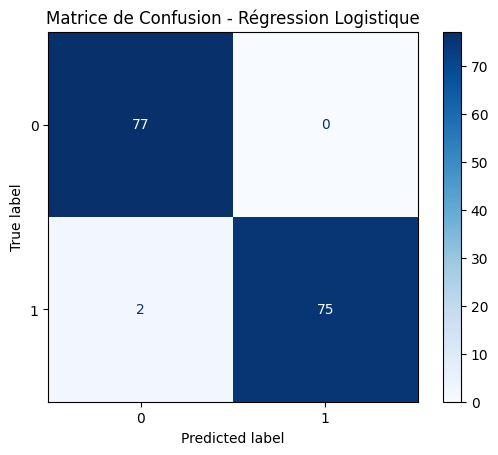



================== Arbre de Décision ==================
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.88      0.86      0.87        77

    accuracy                           0.87       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.87      0.87      0.87       154



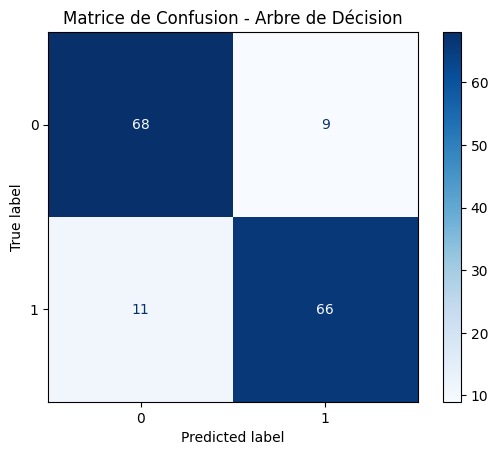



================== Random Forest ==================
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        77
           1       0.93      0.88      0.91        77

    accuracy                           0.91       154
   macro avg       0.91      0.91      0.91       154
weighted avg       0.91      0.91      0.91       154



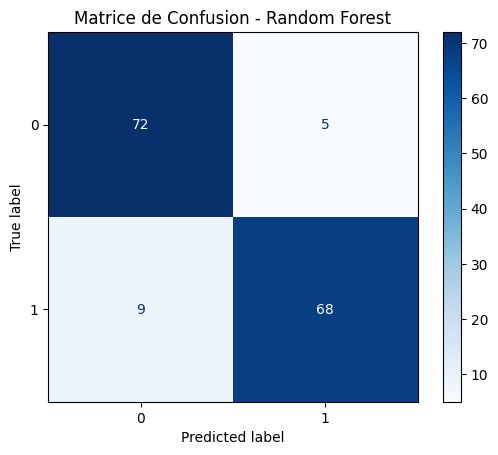



================== SVM ==================
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        77
           1       0.99      0.94      0.96        77

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



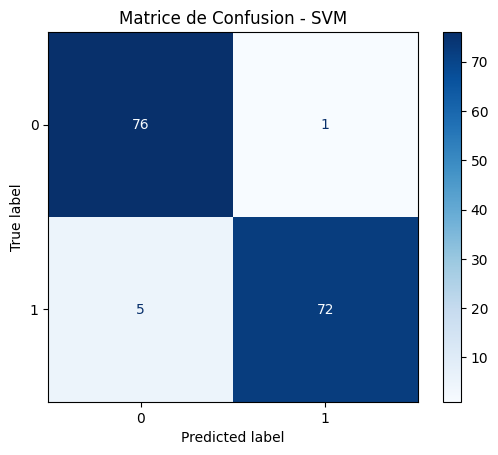



================== Gradient Boosting ==================
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        77
           1       0.93      0.91      0.92        77

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



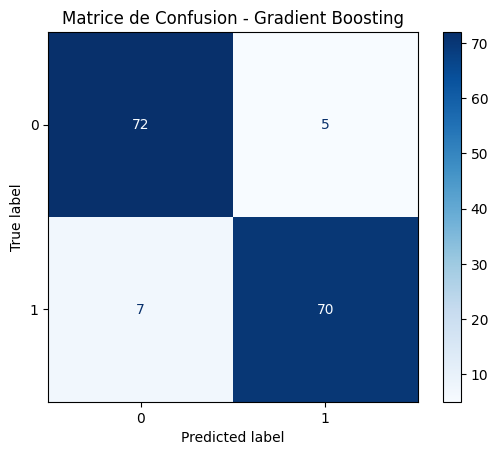



================== XGBoost ==================
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        77
           1       0.93      0.88      0.91        77

    accuracy                           0.91       154
   macro avg       0.91      0.91      0.91       154
weighted avg       0.91      0.91      0.91       154



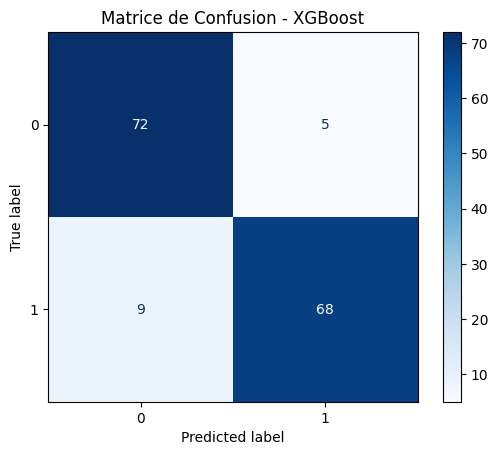



================== RÉSUMÉ DES PERFORMANCES ==================
                  Modèle  Précision    Rappel  F1-Score
0  Régression Logistique   0.974684  1.000000  0.987179
3                    SVM   0.938272  0.987013  0.962025
4      Gradient Boosting   0.911392  0.935065  0.923077
2          Random Forest   0.888889  0.935065  0.911392
5                XGBoost   0.888889  0.935065  0.911392
1      Arbre de Décision   0.860759  0.883117  0.871795


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[name] = {
        'precision': report['0']['precision'],
        'recall': report['0']['recall'],
        'f1-score': report['0']['f1-score']
    }

    print(f"================== {name} ==================")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matrice de Confusion - {name}')
    plt.show()
    print("\n")

print("================== RÉSUMÉ DES PERFORMANCES ==================")
summary_data = []
for name, metrics in results.items():
    summary_data.append({
        'Modèle': name,
        'Précision': metrics['precision'],
        'Rappel': metrics['recall'],
        'F1-Score': metrics['f1-score']
    })

summary_df = pd.DataFrame(summary_data).sort_values(by='F1-Score', ascending=False)
print(summary_df)

================== Régression Logistique ==================
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       1.00      0.97      0.99        77

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



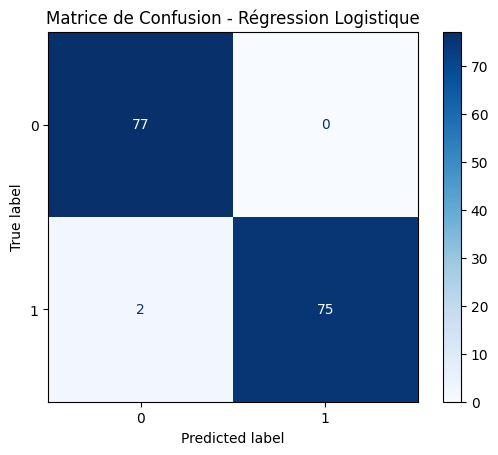



================== Arbre de Décision ==================
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.89      0.83      0.86        77

    accuracy                           0.86       154
   macro avg       0.87      0.86      0.86       154
weighted avg       0.87      0.86      0.86       154



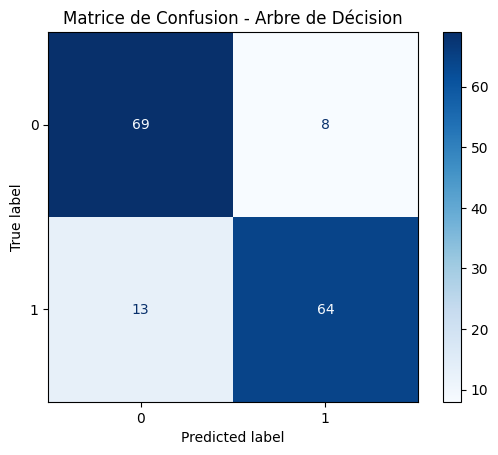



================== Random Forest ==================
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        77
           1       0.95      0.90      0.92        77

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



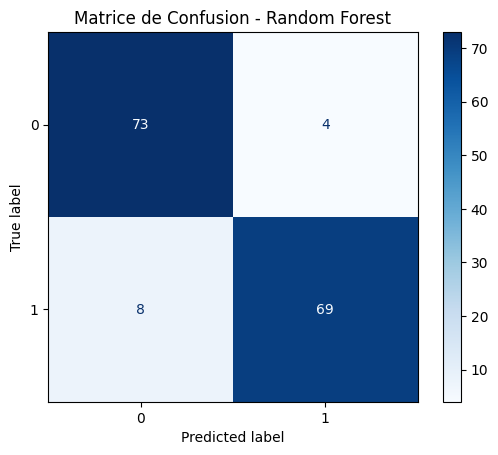



================== SVM ==================
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        77
           1       0.99      0.94      0.96        77

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



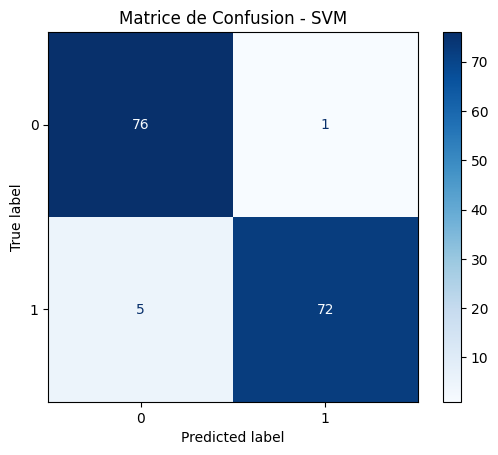



================== Gradient Boosting ==================
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        77
           1       0.93      0.91      0.92        77

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



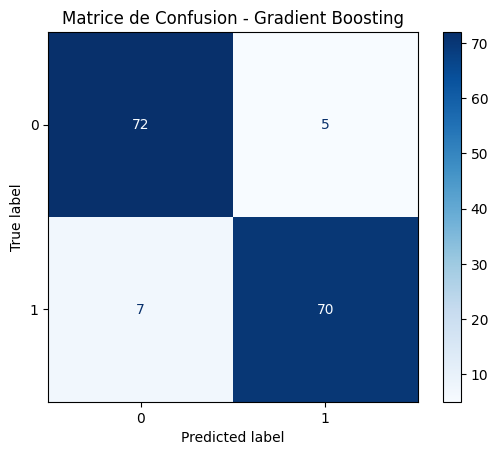



================== XGBoost ==================
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        77
           1       0.93      0.88      0.91        77

    accuracy                           0.91       154
   macro avg       0.91      0.91      0.91       154
weighted avg       0.91      0.91      0.91       154



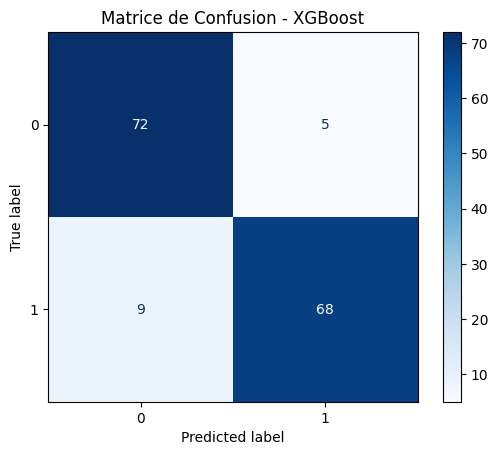



================== RÉSUMÉ DES PERFORMANCES ==================
                  Modèle  Précision    Rappel  F1-Score
0  Régression Logistique   0.974684  1.000000  0.987179
3                    SVM   0.938272  0.987013  0.962025
2          Random Forest   0.901235  0.948052  0.924051
4      Gradient Boosting   0.911392  0.935065  0.923077
5                XGBoost   0.888889  0.935065  0.911392
1      Arbre de Décision   0.841463  0.896104  0.867925


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[name] = {
        'precision': report['0']['precision'],
        'recall': report['0']['recall'],
        'f1-score': report['0']['f1-score']
    }

    print(f"================== {name} ==================")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matrice de Confusion - {name}')
    plt.show()
    print("\n")

print("================== RÉSUMÉ DES PERFORMANCES ==================")
summary_data = []
for name, metrics in results.items():
    summary_data.append({
        'Modèle': name,
        'Précision': metrics['precision'],
        'Rappel': metrics['recall'],
        'F1-Score': metrics['f1-score']
    })

summary_df = pd.DataFrame(summary_data).sort_values(by='F1-Score', ascending=False)
print(summary_df)

In [186]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline

print("================== VALIDATION CROISÉE ==================\n")

cv_results = {}
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    pipeline = ImbPipeline([
        ('resampler', RandomOverSampler(random_state=42)),
        ('classifier', model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv_folds, scoring='f1')
    
    cv_results[name] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }
    
    print(f"{name}:")
    print(f"  F1-Score moyen: {scores.mean()}")
    print(f"  Écart-type: {scores.std()}")
    print(f"  Scores par fold: {scores}")
    print()

print("================== RÉSUMÉ ==================")
summary_cv = []
for name, metrics in cv_results.items():
    summary_cv.append({
        'Modèle': name,
        'F1-Score Moyen': metrics['mean'],
        'Écart-type': metrics['std']
    })

summary_cv_df = pd.DataFrame(summary_cv).sort_values(by='F1-Score Moyen', ascending=False)
print(summary_cv_df)

================== VALIDATION CROISÉE ==================

Régression Logistique:
  F1-Score moyen: 0.9852683753422145
  Écart-type: 0.01696402538279248
  Scores par fold: [0.97841727 0.99270073 1.         1.         0.95522388]

Arbre de Décision:
  F1-Score moyen: 0.8446305520773354
  Écart-type: 0.03545618175990322
  Scores par fold: [0.84057971 0.9        0.81690141 0.86567164 0.8       ]

Random Forest:
  F1-Score moyen: 0.9455445717460224
  Écart-type: 0.013988721626302995
  Scores par fold: [0.94736842 0.95652174 0.96402878 0.92647059 0.93333333]

SVM:
  F1-Score moyen: 0.9711295186923413
  Écart-type: 0.0043172391579432545
  Scores par fold: [0.97142857 0.97810219 0.96453901 0.97142857 0.97014925]

Gradient Boosting:
  F1-Score moyen: 0.9455780801560852
  Écart-type: 0.006489424517133006
  Scores par fold: [0.94117647 0.94814815 0.95714286 0.94202899 0.93939394]

XGBoost:
  F1-Score moyen: 0.9508349564659173
  Écart-type: 0.019648522520284258
  Scores par fold: [0.93333333 0.978

### Utiliser GridSearchCV pour affiner les hyperparamètres des modèles et améliorer leurs performances


In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score


models = {
    'Régression Logistique': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

param_grids = {
    'Régression Logistique': {
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__penalty': ['l2'],
        'clf__solver': ['lbfgs']
    },
    'RandomForest': {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 5, 10],
        'clf__min_samples_split': [2, 5]
    },
    'SVM': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['rbf', 'linear']
    },
    'GradientBoosting': {
        'clf__n_estimators': [50, 100],
        'clf__learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'clf__n_estimators': [50, 100],
        'clf__max_depth': [3, 6],
        'clf__learning_rate': [0.05, 0.1]
    }
}

f1_scorer = make_scorer(f1_score, pos_label=0)

best_scores = {}

for name, model in models.items():
    print(f"--- GridSearchCV for {name} ---")

    pipe = ImbPipeline([
        ('sampler', RandomOverSampler()),
        ('clf', model)
    ])

    gs = GridSearchCV(pipe,
                      param_grids[name],
                      cv=5,
                      scoring=f1_scorer,
                      n_jobs=-1)

    gs.fit(X_train, y_train)

    y_pred = gs.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, pos_label=0)

    best_scores[name] = {
        'Best Params': gs.best_params_,
        'CV F1': gs.best_score_,
        'Test F1': test_f1
    }
    print(f"Best params: {gs.best_params_}")
    print(f"CV F1: {gs.best_score_:.4f} | Hold-out F1: {test_f1:.4f}\n")

summary = pd.DataFrame(best_scores).T.sort_values('Test F1', ascending=False)
print("=== Optimised models summary ===")
print(summary)

--- GridSearchCV for Régression Logistique ---
Best params: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
CV F1: 0.9909 | Hold-out F1: 0.9935

--- GridSearchCV for RandomForest ---
Best params: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
CV F1: 0.9485 | Hold-out F1: 0.9367

--- GridSearchCV for SVM ---
Best params: {'clf__C': 10, 'clf__kernel': 'linear'}
CV F1: 0.9927 | Hold-out F1: 0.9935

--- GridSearchCV for GradientBoosting ---
Best params: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}
CV F1: 0.9524 | Hold-out F1: 0.9231

--- GridSearchCV for XGBoost ---
Best params: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100}
CV F1: 0.9408 | Hold-out F1: 0.9427

=== Optimised models summary ===
                                                             Best Params     CV F1   Test F1
Régression Logistique  {'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...  0.990859  0.993548
SVM                             

### Réentraînement du modèle avec les hyperparamètres optimisés

In [193]:
best_name = summary_cv_df.iloc[0]['Modèle']         
best_model = models[best_name]                       
best_params = best_scores[best_name]['Best Params'] 


final_pipe = ImbPipeline([
    ('resampler', RandomOverSampler(random_state=42)),
    ('clf', best_model)
])

final_pipe.set_params(**best_params)   

final_pipe.fit(X_train, y_train)

y_pred = final_pipe.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9872    1.0000    0.9935        77
           1     1.0000    0.9870    0.9935        77

    accuracy                         0.9935       154
   macro avg     0.9936    0.9935    0.9935       154
weighted avg     0.9936    0.9935    0.9935       154



### Sauvegarder le modèle final

In [194]:
import joblib
joblib.dump(final_pipe, 'best_diabetes_classification_model.pkl')

['best_diabetes_classification_model.pkl']